**Context** <br>
The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

**Content** <br>
The columns are resembling practical world features. <br>
The outcome column indicates 1 if a customer has claimed his/her loan else 0. <br>
The data has 19 features from there 18 of them are corresponding logs which were taken by the company. <br>
<br>
Input variables:

- ID - Unique ID (can not be used for predictions)
- AGE
- GENDER
- RACE
- DRIVING_EXPERIENCE
- EDUCATION
- INCOME
- CREDIT_SCORE
- VEHICLE_OWNERSHIP
- VEHICLE_YEAR
- MARRIED
- CHILDREN
- POSTAL_CODE
- ANNUAL_MILEAGE
- VEHICLE_TYPE
- SPEEDING_VIOLATION
- DUIS
- PAST_ACCIDENTS

Outcomes:

- OUTCOME (Target variable)
<br>
<br>
Source:<br>

<a href="https://www.kaggle.com/datasets/sagnik1511/car-insurance-data">https://www.kaggle.com/datasets/sagnik1511/car-insurance-data</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Data preparation

In [2]:
data = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
data.shape

(10000, 19)

In [5]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Below heatmap shows no correlation between variables.

<AxesSubplot:>

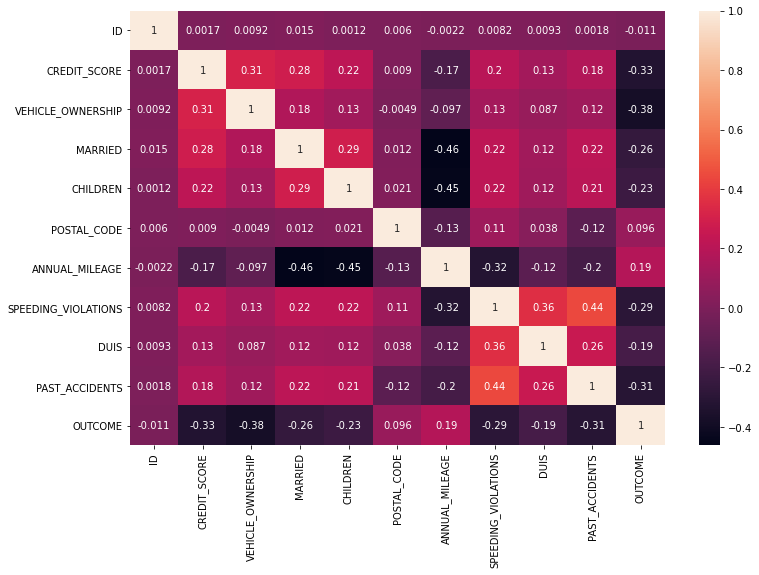

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [7]:
data.drop('ID', inplace=True, axis=1)

In [8]:
data.duplicated().sum()

12

In [9]:
data = data.drop_duplicates()

In [10]:
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## 2. Exploratory Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9988 non-null   object 
 1   GENDER               9988 non-null   object 
 2   RACE                 9988 non-null   object 
 3   DRIVING_EXPERIENCE   9988 non-null   object 
 4   EDUCATION            9988 non-null   object 
 5   INCOME               9988 non-null   object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    9988 non-null   float64
 8   VEHICLE_YEAR         9988 non-null   object 
 9   MARRIED              9988 non-null   float64
 10  CHILDREN             9988 non-null   float64
 11  POSTAL_CODE          9988 non-null   int64  
 12  ANNUAL_MILEAGE       9034 non-null   float64
 13  VEHICLE_TYPE         9988 non-null   object 
 14  SPEEDING_VIOLATIONS  9988 non-null   int64  
 15  DUIS                 9988 non-null   i

In [12]:
data.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           970
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         954
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Target variable: **OUTCOME**

In [13]:
data['OUTCOME'].unique()

array([0., 1.])

Column OUTCOME has two unique values: 0 and 1.

In [14]:
OUTCOME_counts = data['OUTCOME'].value_counts()

In [15]:
OUTCOME_counts

0.0    6864
1.0    3124
Name: OUTCOME, dtype: int64

In [16]:
OUTCOME_counts[0] / OUTCOME_counts[1]

2.1971830985915495

In [17]:
data['OUTCOME'].mean()

0.31277533039647576

<AxesSubplot:title={'center':"OUTCOME: values' counter"}, xlabel='OUTCOME', ylabel='count'>

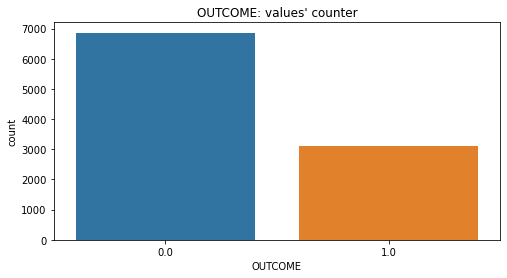

In [18]:
plt.figure(figsize=(8, 4))
plt.title("OUTCOME: values' counter")
sns.countplot(x='OUTCOME', data=data)

Calculated mean and count plot imply that target classes are slightly in-balanced.

**Variable: AGE**

In [19]:
data['AGE'].isna().sum()

0

In [20]:
data['AGE'].value_counts()

26-39    3062
40-64    2931
16-25    2005
65+      1990
Name: AGE, dtype: int64

<AxesSubplot:title={'center':'Age Count colored by outcome'}, xlabel='AGE', ylabel='count'>

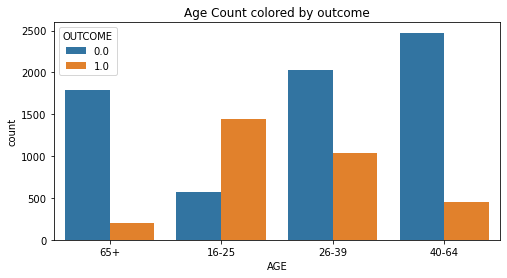

In [21]:
plt.figure(figsize=(8, 4))
plt.title('Age Count colored by outcome')
sns.countplot(data=data, x='AGE', hue='OUTCOME')

**Variable: GENDER**

In [22]:
data['GENDER'].isna().sum()

0

In [23]:
data['GENDER'].value_counts()

female    5003
male      4985
Name: GENDER, dtype: int64

<AxesSubplot:title={'center':'Gender Count color by outcome'}, xlabel='GENDER', ylabel='count'>

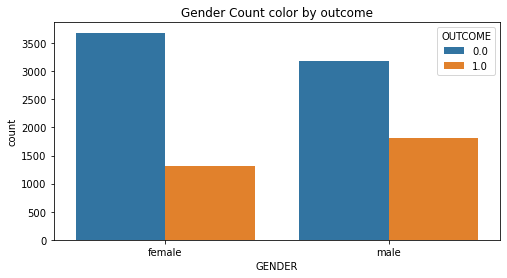

In [24]:
plt.figure(figsize=(8, 4))
plt.title('Gender Count color by outcome')
sns.countplot(data=data, x='GENDER', hue='OUTCOME')

**Variable: RACE**

In [25]:
data['RACE'].isna().sum()

0

In [26]:
data['RACE'].value_counts()

majority    9000
minority     988
Name: RACE, dtype: int64

<AxesSubplot:title={'center':'Race count color by outcome'}, xlabel='RACE', ylabel='count'>

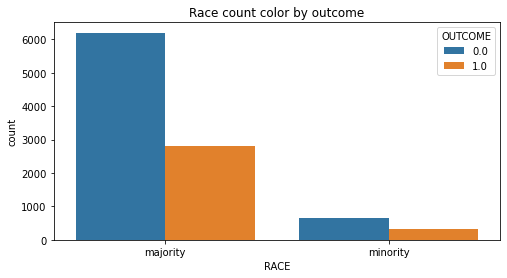

In [27]:
plt.figure(figsize=(8, 4))
plt.title('Race count color by outcome')
sns.countplot(data=data, x='RACE', hue='OUTCOME')

**Variable: DRIVING_EXPERIENCE**

In [28]:
data['DRIVING_EXPERIENCE'].isna().sum()

0

In [29]:
data['DRIVING_EXPERIENCE'].value_counts()

0-9y      3519
10-19y    3298
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

<AxesSubplot:title={'center':'Driving experience Count color by outcome'}, xlabel='DRIVING_EXPERIENCE', ylabel='count'>

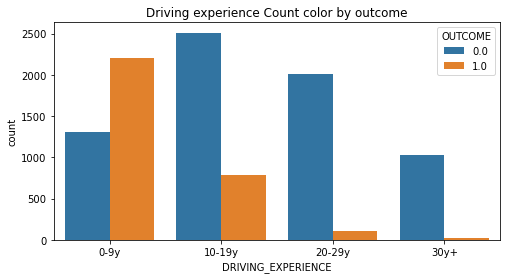

In [30]:
plt.figure(figsize=(8, 4))
plt.title('Driving experience Count color by outcome')
sns.countplot(data=data, x='DRIVING_EXPERIENCE', hue='OUTCOME')

**Variable: EDUCATION**

In [31]:
data['EDUCATION'].isna().sum()

0

In [32]:
data['EDUCATION'].value_counts()

high school    4151
university     3927
none           1910
Name: EDUCATION, dtype: int64

<AxesSubplot:title={'center':'Education Count color by outcome'}, xlabel='EDUCATION', ylabel='count'>

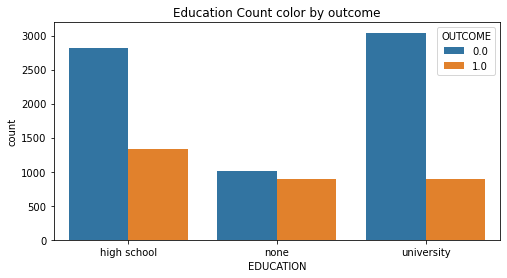

In [33]:
plt.figure(figsize=(8, 4))
plt.title('Education Count color by outcome')
sns.countplot(data=data, x='EDUCATION', hue='OUTCOME')

**Variable: INCOME**

In [34]:
data['INCOME'].isna().sum()

0

In [35]:
data['INCOME'].value_counts()

upper class      4335
middle class     2138
poverty          1804
working class    1711
Name: INCOME, dtype: int64

<AxesSubplot:title={'center':'Income Count color by outcome'}, xlabel='INCOME', ylabel='count'>

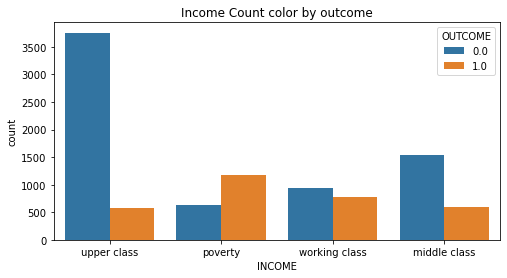

In [36]:
plt.figure(figsize=(8, 4))
plt.title('Income Count color by outcome')
sns.countplot(data=data, x='INCOME', hue='OUTCOME')

**Variable: CREDIT_SCORE**

In [37]:
data['CREDIT_SCORE'].isna().sum()

970

In [38]:
data['CREDIT_SCORE'].value_counts()

0.617333    1
0.447405    1
0.788566    1
0.548152    1
0.608538    1
           ..
0.501158    1
0.665393    1
0.499761    1
0.553830    1
0.270302    1
Name: CREDIT_SCORE, Length: 9018, dtype: int64

<AxesSubplot:title={'center':'Credit Score histogram'}, xlabel='CREDIT_SCORE', ylabel='Count'>

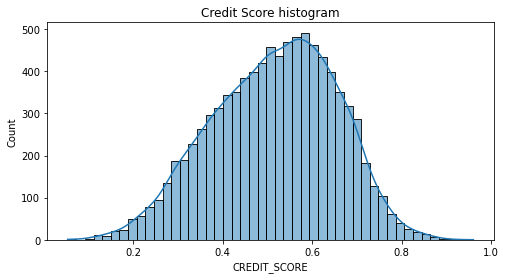

In [39]:
plt.figure(figsize=(8, 4))
plt.title('Credit Score histogram')
sns.histplot(data=data, x='CREDIT_SCORE', kde=True)

<AxesSubplot:title={'center':'Boxplot of Credit Score'}, xlabel='CREDIT_SCORE'>

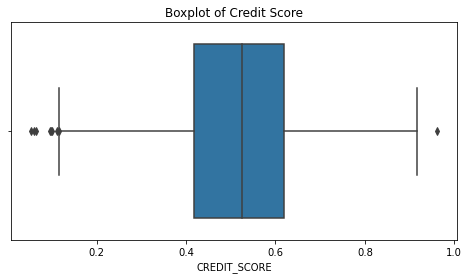

In [40]:
plt.figure(figsize=(8,4))
plt.title('Boxplot of Credit Score')
sns.boxplot(data=data, x='CREDIT_SCORE')

In [41]:
data['CREDIT_SCORE'] = data['CREDIT_SCORE'].fillna(  int( np.mean(data['CREDIT_SCORE']) )  )

**Variable: VEHICLE_OWNERSHIP**

In [42]:
data['VEHICLE_OWNERSHIP'].isna().sum()

0

In [43]:
data['VEHICLE_OWNERSHIP'].value_counts()

1.0    6967
0.0    3021
Name: VEHICLE_OWNERSHIP, dtype: int64

<AxesSubplot:title={'center':'Vehicle ownership Count color by outcome'}, xlabel='VEHICLE_OWNERSHIP', ylabel='count'>

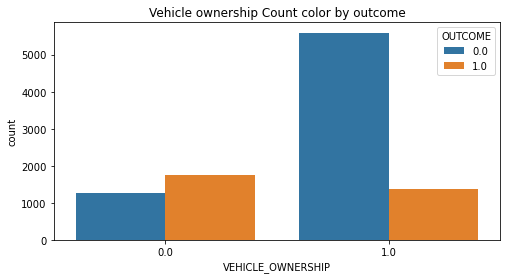

In [44]:
plt.figure(figsize=(8, 4))
plt.title('Vehicle ownership Count color by outcome')
sns.countplot(data=data, x='VEHICLE_OWNERSHIP', hue='OUTCOME')

**Variable: VEHICLE_YEAR**

In [45]:
data['VEHICLE_YEAR'].isna().sum()

0

In [46]:
data['VEHICLE_YEAR'].value_counts()

before 2015    6955
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64

<AxesSubplot:title={'center':'Vehicle year Count color by outcome'}, xlabel='VEHICLE_YEAR', ylabel='count'>

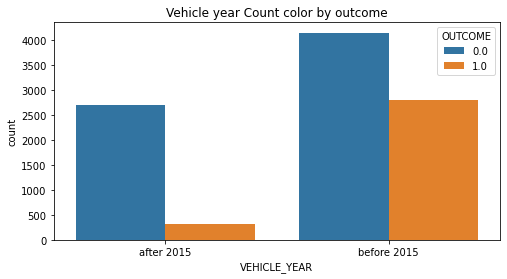

In [47]:
plt.figure(figsize=(8, 4))
plt.title('Vehicle year Count color by outcome')
sns.countplot(data=data, x='VEHICLE_YEAR', hue='OUTCOME')

**Variable: MARRIED**

In [48]:
data['MARRIED'].isna().sum()

0

In [49]:
data['MARRIED'].value_counts()

0.0    5007
1.0    4981
Name: MARRIED, dtype: int64

<AxesSubplot:title={'center':'Married Count color by outcome'}, xlabel='MARRIED', ylabel='count'>

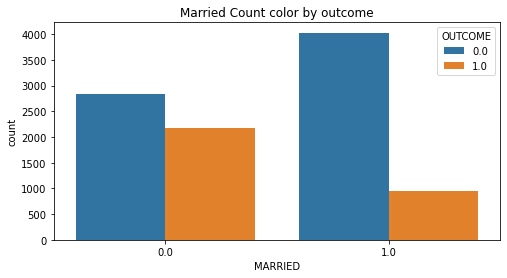

In [50]:
plt.figure(figsize=(8, 4))
plt.title('Married Count color by outcome')
sns.countplot(data=data, x='MARRIED', hue='OUTCOME')

**Variable: CHILDREN**

In [51]:
data['CHILDREN'].isna().sum()

0

In [52]:
data['CHILDREN'].value_counts()

1.0    6885
0.0    3103
Name: CHILDREN, dtype: int64

<AxesSubplot:title={'center':'Children Count color by outcome'}, xlabel='CHILDREN', ylabel='count'>

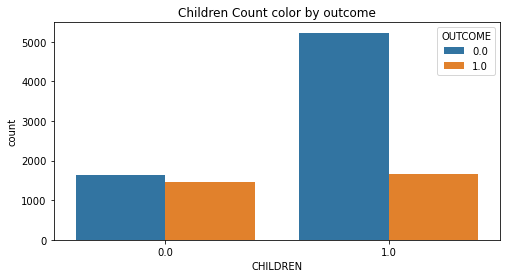

In [53]:
plt.figure(figsize=(8, 4))
plt.title('Children Count color by outcome')
sns.countplot(data=data, x='CHILDREN', hue='OUTCOME')

**Variable: POSTAL_CODE**

In [54]:
data['POSTAL_CODE'].isna().sum()

0

In [55]:
data['POSTAL_CODE'].value_counts()

10238    6929
32765    2455
92101     484
21217     120
Name: POSTAL_CODE, dtype: int64

<AxesSubplot:title={'center':'Postal code Count color by outcome'}, xlabel='POSTAL_CODE', ylabel='count'>

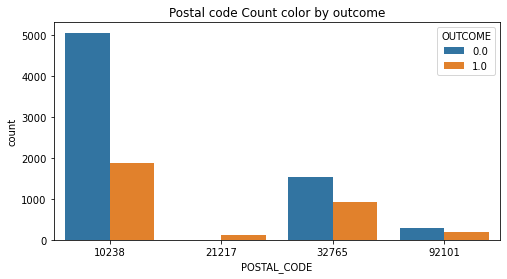

In [56]:
plt.figure(figsize=(8, 4))
plt.title('Postal code Count color by outcome')
sns.countplot(data=data, x='POSTAL_CODE', hue='OUTCOME')

**Variable: ANNUAL_MILEAGE**

In [57]:
data['ANNUAL_MILEAGE'].isna().sum()

954

In [58]:
data['ANNUAL_MILEAGE'].value_counts()

11000.0    1253
12000.0    1218
13000.0    1136
10000.0    1071
14000.0     891
9000.0      855
15000.0     630
8000.0      557
16000.0     418
7000.0      322
17000.0     245
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
22000.0       2
2000.0        2
Name: ANNUAL_MILEAGE, dtype: int64

<AxesSubplot:title={'center':'Annual mileage Count color by outcome'}, xlabel='ANNUAL_MILEAGE', ylabel='count'>

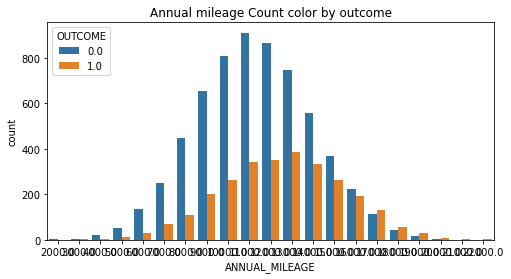

In [59]:
plt.figure(figsize=(8, 4))
plt.title('Annual mileage Count color by outcome')
sns.countplot(data=data, x='ANNUAL_MILEAGE', hue='OUTCOME')

In [60]:
data['ANNUAL_MILEAGE'] = data['ANNUAL_MILEAGE'].fillna(  int( np.mean(data['ANNUAL_MILEAGE']) )  )

**Variable: VEHICLE_TYPE**

In [61]:
data['VEHICLE_TYPE'].isna().sum()

0

In [62]:
data['VEHICLE_TYPE'].value_counts()

sedan         9511
sports car     477
Name: VEHICLE_TYPE, dtype: int64

<AxesSubplot:title={'center':'Vehicle type Count color by outcome'}, xlabel='VEHICLE_TYPE', ylabel='count'>

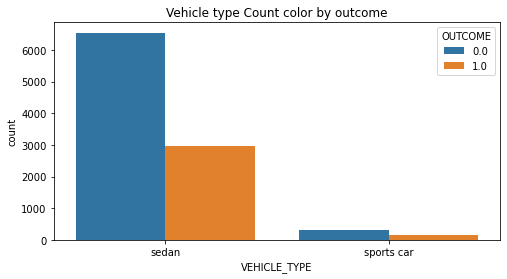

In [63]:
plt.figure(figsize=(8, 4))
plt.title('Vehicle type Count color by outcome')
sns.countplot(data=data, x='VEHICLE_TYPE', hue='OUTCOME')

**Variable: SPEEDING_VIOLATIONS**

In [64]:
data['SPEEDING_VIOLATIONS'].isna().sum()

0

In [65]:
data['SPEEDING_VIOLATIONS'].value_counts()

0     5017
1     1543
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64

<AxesSubplot:title={'center':'Speeding violations Count color by outcome'}, xlabel='SPEEDING_VIOLATIONS', ylabel='count'>

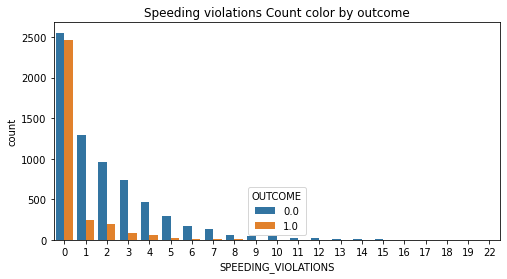

In [66]:
plt.figure(figsize=(8, 4))
plt.title('Speeding violations Count color by outcome')
sns.countplot(data=data, x='SPEEDING_VIOLATIONS', hue='OUTCOME')

**Variable: DUIS**

In [67]:
data['DUIS'].isna().sum()

0

In [68]:
data['DUIS'].value_counts()

0    8106
1    1470
2     331
3      68
4      10
5       2
6       1
Name: DUIS, dtype: int64

<AxesSubplot:title={'center':'Duis Count color by outcome'}, xlabel='DUIS', ylabel='count'>

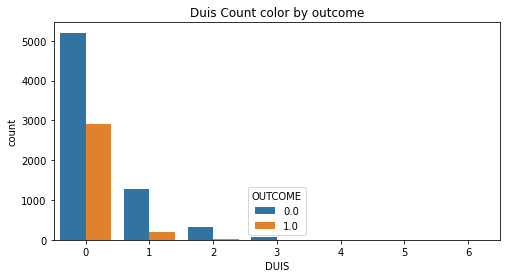

In [69]:
plt.figure(figsize=(8, 4))
plt.title('Duis Count color by outcome')
sns.countplot(data=data, x='DUIS', hue='OUTCOME')

**Variable: PAST_ACCIDENTS**

In [70]:
data['PAST_ACCIDENTS'].isna().sum()

0

In [71]:
data['PAST_ACCIDENTS'].value_counts()

0     5573
1     1783
2     1103
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
14       1
15       1
Name: PAST_ACCIDENTS, dtype: int64

<AxesSubplot:title={'center':'Past accidents Count color by outcome'}, xlabel='PAST_ACCIDENTS', ylabel='count'>

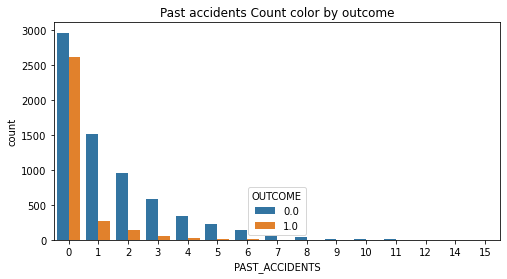

In [72]:
plt.figure(figsize=(8, 4))
plt.title('Past accidents Count color by outcome')
sns.countplot(data=data, x='PAST_ACCIDENTS', hue='OUTCOME')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9988 non-null   object 
 1   GENDER               9988 non-null   object 
 2   RACE                 9988 non-null   object 
 3   DRIVING_EXPERIENCE   9988 non-null   object 
 4   EDUCATION            9988 non-null   object 
 5   INCOME               9988 non-null   object 
 6   CREDIT_SCORE         9988 non-null   float64
 7   VEHICLE_OWNERSHIP    9988 non-null   float64
 8   VEHICLE_YEAR         9988 non-null   object 
 9   MARRIED              9988 non-null   float64
 10  CHILDREN             9988 non-null   float64
 11  POSTAL_CODE          9988 non-null   int64  
 12  ANNUAL_MILEAGE       9988 non-null   float64
 13  VEHICLE_TYPE         9988 non-null   object 
 14  SPEEDING_VIOLATIONS  9988 non-null   int64  
 15  DUIS                 9988 non-null   i

In [74]:
data.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

## 3. Modelling

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


In [76]:
CATEGORICAL_FEATURES = [  'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
    'VEHICLE_OWNERSHIP','VEHICLE_YEAR', 'VEHICLE_TYPE','MARRIED','CHILDREN','DUIS']

NUMERICAL_FEATURES = ['CREDIT_SCORE','VEHICLE_OWNERSHIP', 'SPEEDING_VIOLATIONS','PAST_ACCIDENTS' ] 


In [77]:
len(NUMERICAL_FEATURES)

4

In [78]:
col_trans = ColumnTransformer(transformers=[
                                    ('categorical_features', OneHotEncoder(), CATEGORICAL_FEATURES),
                                    ('numerical_features', StandardScaler(), NUMERICAL_FEATURES)
                        ]
)
col_trans.fit_transform(data)

array([[ 0.        ,  0.        ,  0.        , ...,  0.65849496,
        -0.66197521, -0.63968032],
       [ 1.        ,  0.        ,  0.        , ..., -1.5186145 ,
        -0.66197521, -0.63968032],
       [ 1.        ,  0.        ,  0.        , ...,  0.65849496,
        -0.66197521, -0.63968032],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.65849496,
        -0.66197521, -0.63968032],
       [ 0.        ,  1.        ,  0.        , ..., -1.5186145 ,
         0.22982522, -0.03470664],
       [ 0.        ,  1.        ,  0.        , ...,  0.65849496,
        -0.66197521, -0.63968032]])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9988 non-null   object 
 1   GENDER               9988 non-null   object 
 2   RACE                 9988 non-null   object 
 3   DRIVING_EXPERIENCE   9988 non-null   object 
 4   EDUCATION            9988 non-null   object 
 5   INCOME               9988 non-null   object 
 6   CREDIT_SCORE         9988 non-null   float64
 7   VEHICLE_OWNERSHIP    9988 non-null   float64
 8   VEHICLE_YEAR         9988 non-null   object 
 9   MARRIED              9988 non-null   float64
 10  CHILDREN             9988 non-null   float64
 11  POSTAL_CODE          9988 non-null   int64  
 12  ANNUAL_MILEAGE       9988 non-null   float64
 13  VEHICLE_TYPE         9988 non-null   object 
 14  SPEEDING_VIOLATIONS  9988 non-null   int64  
 15  DUIS                 9988 non-null   i

In [80]:
y = data.OUTCOME

In [81]:
X = data.drop('OUTCOME', axis=1)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
estimators = [
    ('lr', LogisticRegression()),
    ('dtc', DecisionTreeClassifier()),
    ('rfc', RandomForestClassifier()),
    ('knc', KNeighborsClassifier())
]

In [84]:
models = [
    [('LR', LogisticRegression(max_iter=500))],
    [('RandomForest', RandomForestClassifier())],
    [('ExtraTrees', ExtraTreesClassifier())],
    [('AdaBoost', AdaBoostClassifier())],
    [('GradientBoosting', GradientBoostingClassifier())],
    [('Voting', VotingClassifier(estimators=estimators))],
    [('Bagging', BaggingClassifier(DecisionTreeClassifier(),
                                  max_samples=0.7,
                                  bootstrap=True))],
    [('LinearSVC', LinearSVC())],   
    [('SVC',SVC(),  )],
    [('KNeighbors', KNeighborsClassifier())],
    [('DecisionTree', DecisionTreeClassifier())],
    [('MLP', MLPClassifier((64, 32, 16), max_iter=1000))],
]

params_grid =[{ 'LR__solver':['liblinear'],
                'LR__C': [0.01, 0.1, 1],  
                'LR__penalty': ['l1', 'l2'], },
                
                {'RandomForest__max_depth': [2, 5],
                'RandomForest__min_samples_leaf': [2, 5],
                'RandomForest__min_samples_split': [2, 5], },
              
                {'ExtraTrees__max_depth': [2,5],
                 'ExtraTrees__min_samples_leaf': [2,5],
                 'ExtraTrees__min_samples_split': [2,5], },
              
                {'AdaBoost__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
                 'AdaBoost__learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
                 'AdaBoost__algorithm': ['SAMME', 'SAMME.R'], },
              
                {'GradientBoosting__n_estimators': [5, 50, 250, 500],
                 'GradientBoosting__max_depth': [1, 3, 5, 7, 9],
                 'GradientBoosting__learning_rate': [0.01, 0.1, 1, 10, 100], },
              
                {'Voting__voting':['hard', 'soft']},
              
                {'Bagging__n_estimators': [200], 
                 'Bagging__max_features': [10, 20],
                 'Bagging__base_estimator__max_depth': [5, 10, 20, 40],
                 'Bagging__base_estimator__min_samples_leaf': [5, 15, 20, 40],
                 'Bagging__base_estimator__min_samples_split': [5, 15, 20, 40],
                 'Bagging__base_estimator__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 40}, {0: 1, 1: 60}, ] },
              
                {'LinearSVC__C': [0.1, 1, 10, 100, 1000], },
              
               {'SVC__C': [0.1, 1, 10, 100],                
                'SVC__kernel': ['linear', 'poly', 'rbf'],
               },
              
               {'KNeighbors__n_neighbors': [1 ,10, 1],
                 'KNeighbors__leaf_size':[20, 40, 1],
                 'KNeighbors__p': [1, 2],
                 'KNeighbors__weights': ['uniform', 'distance'],
                 'KNeighbors__metric': ['minkowski', 'chebyshev',] },
              
             {'DecisionTree__criterion': ['gini', 'entropy'],
                 'DecisionTree__max_depth': [2, 4, 6, 8, 10, 12], },
              
                {'MLP__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
                 'MLP__activation': ['tanh', 'relu'],
                 'MLP__solver': ['sgd', 'adam'],
                 'MLP__alpha': [0.0001, 0.05],
                 'MLP__learning_rate': ['constant', 'adaptive'], },
]

In [85]:
from  sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [86]:
for model, params in  zip(models,params_grid):        
    pipe = Pipeline(steps=[("transformer", col_trans),model[0]])
    gs = GridSearchCV(estimator=pipe,
                      param_grid=params,
                      cv=2,
                      verbose=1,
                      n_jobs=-1)
    gs.fit(X_train, y_train)   
    
    print(model)
    print('Classification Report:')
    print('')
    print(classification_report(y_test, gs.best_estimator_.predict(X_test)))
    print('CONFUSION MATRIX:')
    print(confusion_matrix(y_test, gs.best_estimator_.predict(X_test)))
    print('')
    
       
        

Fitting 2 folds for each of 6 candidates, totalling 12 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


[('LR', LogisticRegression(max_iter=500))]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1387
         1.0       0.76      0.67      0.71       611

    accuracy                           0.83      1998
   macro avg       0.81      0.79      0.80      1998
weighted avg       0.83      0.83      0.83      1998

CONFUSION MATRIX:
[[1255  132]
 [ 203  408]]

Fitting 2 folds for each of 8 candidates, totalling 16 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


[('RandomForest', RandomForestClassifier())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      1387
         1.0       0.82      0.38      0.52       611

    accuracy                           0.78      1998
   macro avg       0.80      0.67      0.69      1998
weighted avg       0.79      0.78      0.75      1998

CONFUSION MATRIX:
[[1335   52]
 [ 381  230]]

Fitting 2 folds for each of 8 candidates, totalling 16 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


[('ExtraTrees', ExtraTreesClassifier())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85      1387
         1.0       0.84      0.30      0.45       611

    accuracy                           0.77      1998
   macro avg       0.80      0.64      0.65      1998
weighted avg       0.79      0.77      0.73      1998

CONFUSION MATRIX:
[[1352   35]
 [ 425  186]]

Fitting 2 folds for each of 192 candidates, totalling 384 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[('AdaBoost', AdaBoostClassifier())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1387
         1.0       0.62      0.68      0.65       611

    accuracy                           0.77      1998
   macro avg       0.74      0.75      0.74      1998
weighted avg       0.78      0.77      0.78      1998

CONFUSION MATRIX:
[[1134  253]
 [ 198  413]]

Fitting 2 folds for each of 100 candidates, totalling 200 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[('GradientBoosting', GradientBoostingClassifier())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82      1387
         1.0       0.00      0.00      0.00       611

    accuracy                           0.69      1998
   macro avg       0.35      0.50      0.41      1998
weighted avg       0.48      0.69      0.57      1998



C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX:
[[1387    0]
 [ 611    0]]

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[('Voting', VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dtc', DecisionTreeClassifier()),
                             ('rfc', RandomForestClassifier()),
                             ('knc', KNeighborsClassifier())]))]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1387
         1.0       0.74      0.60      0.66       611

    accuracy                           0.81      1998
   macro avg       0.79      0.76      0.77      1998
weighted avg       0.81      0.81      0.81      1998

CONFUSION MATRIX:
[[1257  130]
 [ 242  369]]

Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan n

[('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7))]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1387
         1.0       0.78      0.54      0.64       611

    accuracy                           0.81      1998
   macro avg       0.80      0.74      0.76      1998
weighted avg       0.81      0.81      0.80      1998

CONFUSION MATRIX:
[[1293   94]
 [ 279  332]]

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[('LinearSVC', LinearSVC())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1387
         1.0       0.75      0.71      0.73       611

    accuracy                           0.84      1998
   macro avg       0.81      0.80      0.81      1998
weighted avg       0.84      0.84      0.84      1998

CONFUSION MATRIX:
[[1245  142]
 [ 179  432]]

Fitting 2 folds for each of 12 candidates, totalling 24 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[('SVC', SVC())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1387
         1.0       0.74      0.69      0.72       611

    accuracy                           0.83      1998
   macro avg       0.80      0.79      0.80      1998
weighted avg       0.83      0.83      0.83      1998

CONFUSION MATRIX:
[[1236  151]
 [ 187  424]]

Fitting 2 folds for each of 72 candidates, totalling 144 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[('KNeighbors', KNeighborsClassifier())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1387
         1.0       0.62      0.62      0.62       611

    accuracy                           0.77      1998
   macro avg       0.72      0.73      0.73      1998
weighted avg       0.77      0.77      0.77      1998

CONFUSION MATRIX:
[[1149  238]
 [ 230  381]]

Fitting 2 folds for each of 12 candidates, totalling 24 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[('DecisionTree', DecisionTreeClassifier())]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1387
         1.0       0.72      0.62      0.67       611

    accuracy                           0.81      1998
   macro avg       0.78      0.76      0.77      1998
weighted avg       0.80      0.81      0.81      1998

CONFUSION MATRIX:
[[1237  150]
 [ 231  380]]

Fitting 2 folds for each of 48 candidates, totalling 96 fits


C:\Users\Notebook Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[('MLP', MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000))]
Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1387
         1.0       0.74      0.72      0.73       611

    accuracy                           0.84      1998
   macro avg       0.81      0.80      0.81      1998
weighted avg       0.84      0.84      0.84      1998

CONFUSION MATRIX:
[[1236  151]
 [ 174  437]]

